In [3]:
import numpy as np
from pathlib import Path
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.extend(['../../scripts','../../scripts/xenium'])
import readwrite
cfg = readwrite.config()

In [4]:
# cfg paths
xenium_dir = Path(cfg['xenium_processed_data_dir'])
xenium_raw_data_dir = Path(cfg['xenium_raw_data_dir'])
results_dir = Path(cfg['results_dir'])

# Segmentation, mapping paths
dir_segmentations = {
    dir_segmentation.name: (dir_segmentation)
    for dir_segmentation in xenium_dir.iterdir()
}

# Read resegmentations and RCTD

xenium_paths = {}
umaps = {}
cc_paths = []

for segmentation in (segmentations := xenium_dir.iterdir()):
    for cohort in (cohorts := segmentation.iterdir()): 
        for panel in (panels := cohort.iterdir()):
            for sample in (samples := panel.iterdir()):
                for replicate in (replicates := sample.iterdir()):
                    
                    k = (segmentation.stem,cohort.stem,panel.stem,sample.stem,replicate.stem)
                    replicate_path = replicate / "normalised_results/outs"
                    name = '/'.join(k)

                    xenium_paths[k] = replicate_path


xenium_levels = ('segmentation','cohort','panel','sample','replicate')
# ads = readwrite.read_xenium_samples(xenium_paths,anndata_only=True,transcripts=False,sample_name_as_key=False)
# ads = pd.Series(ads.values(),
#                 index=pd.Index(ads.keys(),name = xenium_levels),
#                 dtype=object).sort_index()

In [14]:
umaps = {}
# Read RCTD
for k,replicate_path in xenium_paths.items():
    file = replicate_path / 'analysis/umap/gene_expression_2_components/projection.csv'
    if file.exists():
        umaps[k] = pd.read_csv(file,index_col=0)

In [13]:
rctd = {}
# Read RCTD
for k,path in xenium_paths.items():

    if (references := path.parents[1] / "cell_type_annotation/reference_based").exists():
            
        rctd[k] = {}

        for reference in (references := path.parents[1] / "cell_type_annotation/reference_based").iterdir():
            for method in (methods := reference.iterdir()):
                for level in (levels := method.iterdir()):
                    cell_type_annotation_file = level / 'single_cell/labels.csv'
                    if cell_type_annotation_file.exists():
                        rctd[k][reference.stem,method.stem,level.stem] = pd.read_csv(cell_type_annotation_file,index_col=0).iloc[:,0]

StopIteration: 

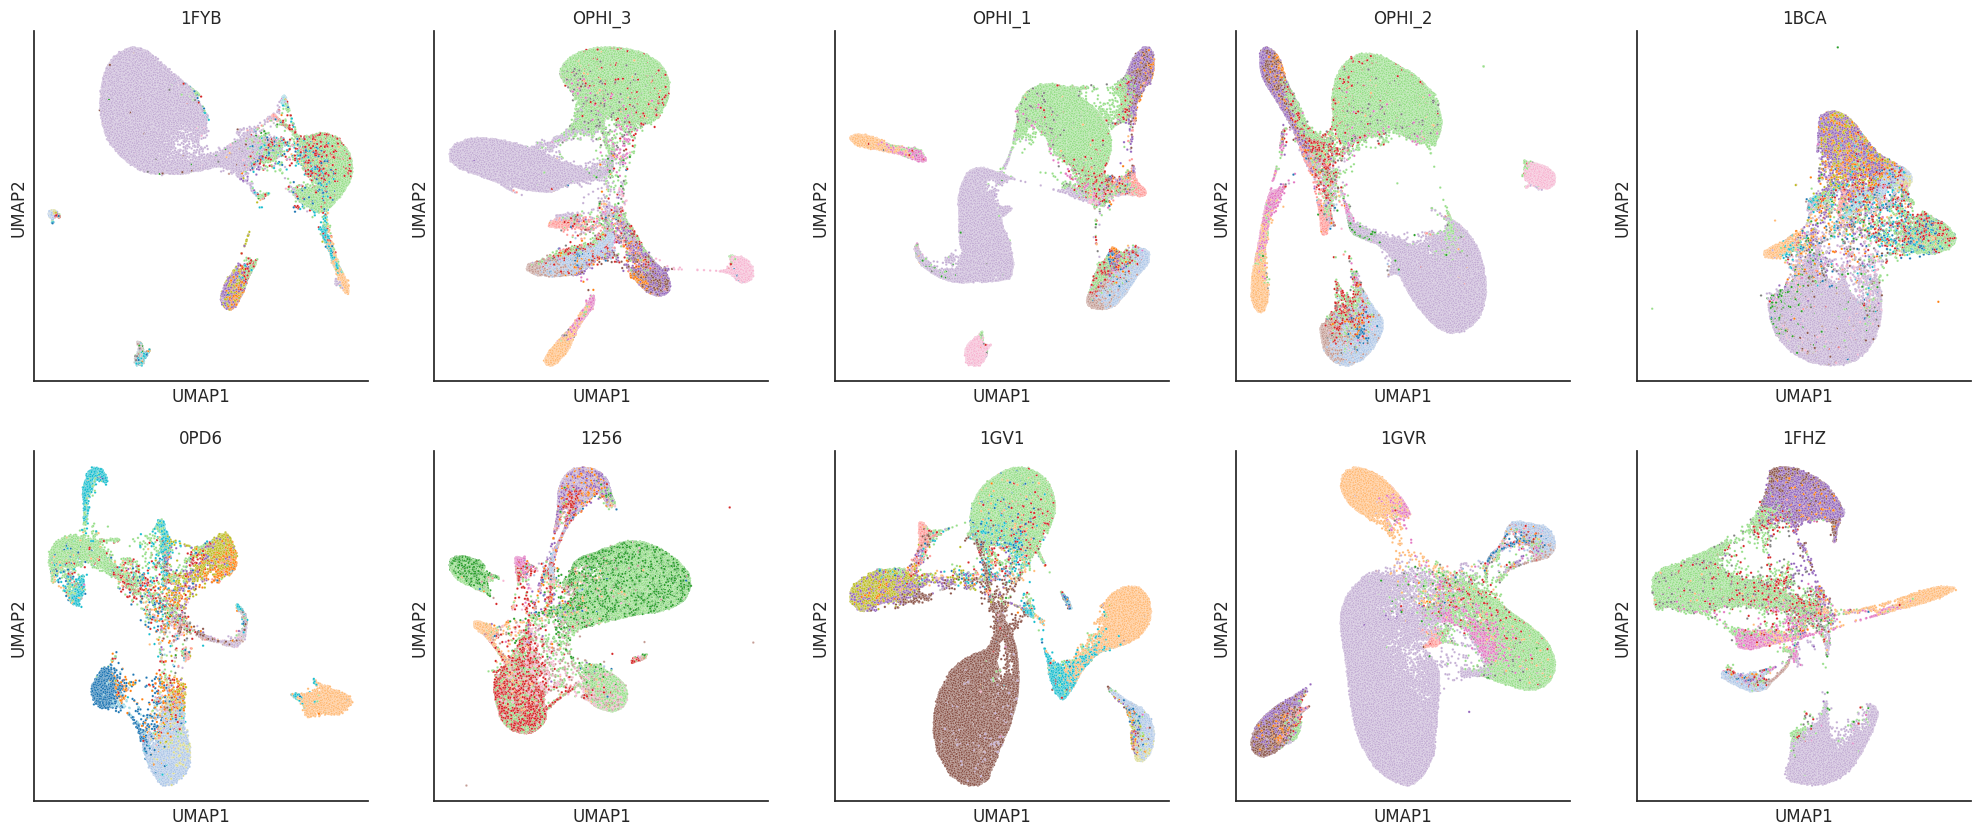

In [51]:
references = ['matched_reference']
methods = ['rctd']
levels = ['Level2']

keys = pd.DataFrame(rctd.keys(),columns=xenium_levels)
cohort_panels = keys[['cohort','panel']].drop_duplicates()

for reference in references:
    for method in methods:
        for level in levels:
            params = (reference,method,level)

            for cohort,panel in cohort_panels.values:
                f, axs = plt.subplots(2,5,figsize=(25,10))
                axs = axs.flat

                for _,k_ in keys.iterrows():
                    if (cohort == k_['cohort'] and panel ==  k_['panel']):
                        k = tuple(k_)
                        
                        if k in umaps and k in rctd and params in rctd[k]:
                            umaps_k = umaps[k]
                            rctd_k = rctd[k][reference,method,level]

                            # Convert to DataFrame for easier plotting
                            df = pd.concat((umaps_k, rctd_k), axis=1).dropna()
                            df.columns = ('UMAP1','UMAP2',' '.join(params))

                            palette = dict(zip(np.unique(df.iloc[:,2]), sns.color_palette("tab20", n_colors=len(df.iloc[:,2]))))
                            # sns.set(style="ticks")
                            ax = next(axs)
                            g = sns.scatterplot(data=df, x="UMAP1", y="UMAP2", s=3, hue=df.columns[2], ax=ax, legend=None, palette=palette)
                            ax.set_title(k[-1])
                            ax.xaxis.set_ticks([])
                            ax.yaxis.set_ticks([])
                            sns.despine()

                plt.suptitle(f"{cohort=} {panel=} {method=} {reference=} {level=}")
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Segmentation', frameon=False)
                # plt.savefig(cfg['figures_dir'] + f"{cohort=} {panel=} {method=} {reference=} {level=}.png",dpi=300,bbox_inches='tight')
                plt.show()

ValueError: The palette dictionary is missing keys: {'malignant cell of breast 1GVR', 'malignant cell of lung 0PSV', 'malignant cell of lung 1GA2', 'malignant cell of breast 1FHZ', 'malignant cell of lung 1G73', 'malignant cell of lung 0WMU', 'malignant cell of breast OPHI'}

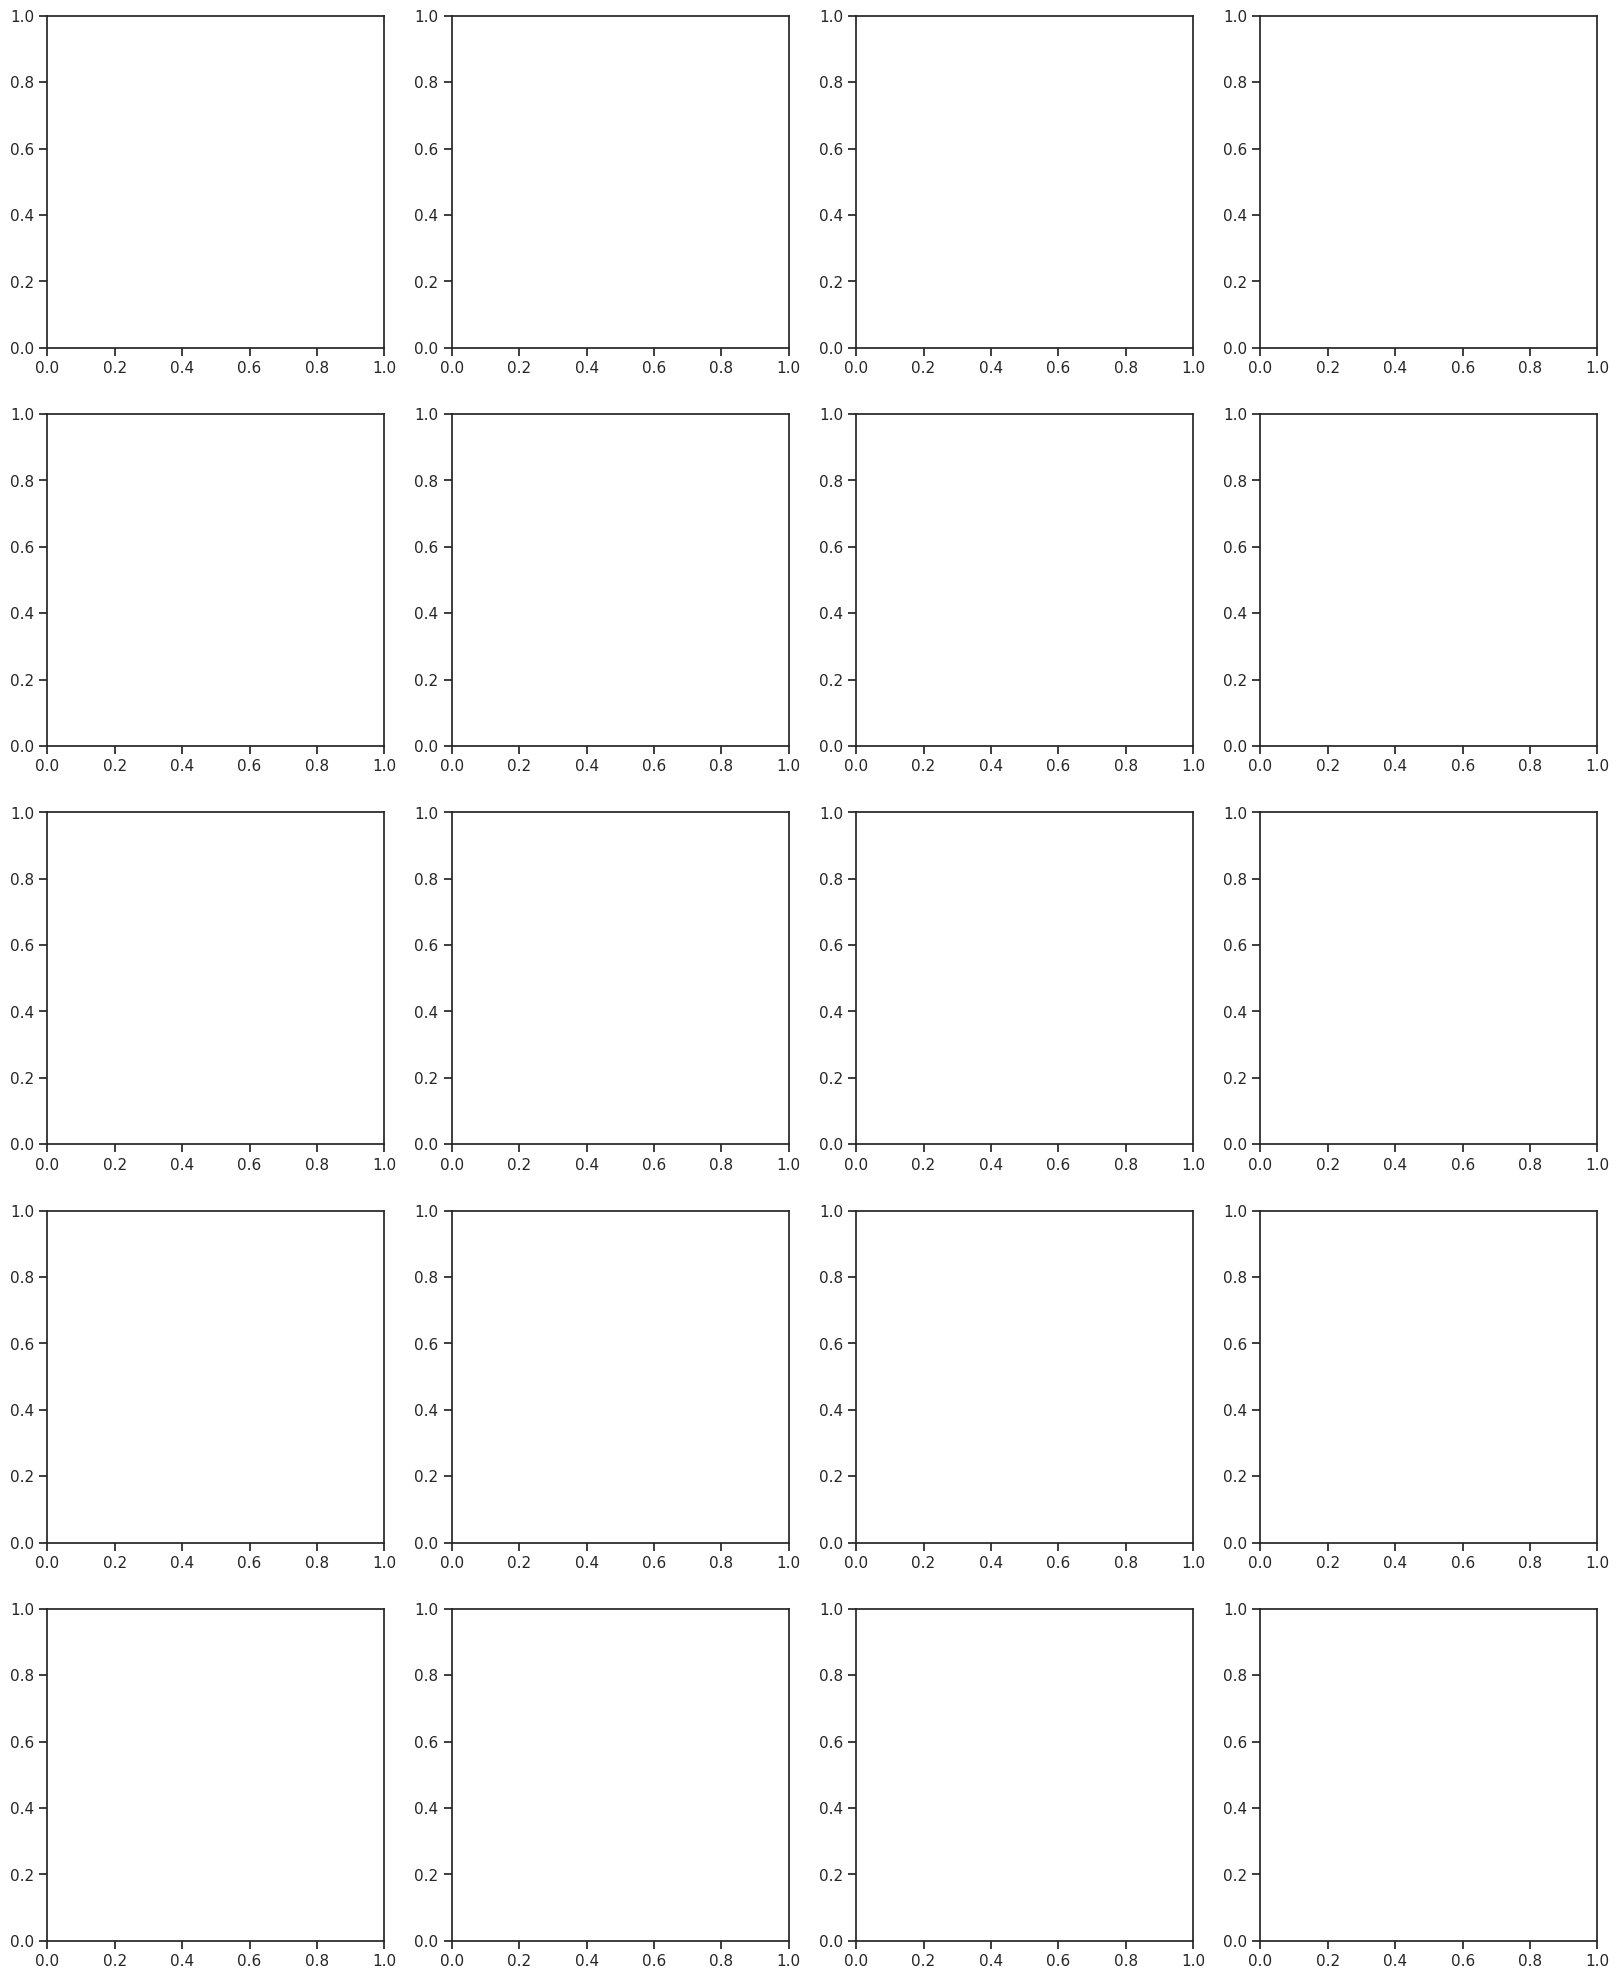

In [ ]:
# Define the parameters
references = ['matched_reference']
methods = ['rctd']
levels = ['Level2']

annot_palettes = dict(
Level1 = {"glial cell": "#D9D2E9", "B cell": "#FF00FF", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "stromal cell": "#26B2B2", "stromal cell": "#26B2B2", "stromal cell": "#26B2B2", "stromal cell": "#26B2B2", "stromal cell": "#26B2B2", "stromal cell": "#26B2B2", "stromal cell": "#26B2B2", "myeloid cell": "#DE5555", "epithelial cell": "#BC8F8F", "epithelial cell": "#BC8F8F", "epithelial cell": "#BC8F8F", "epithelial cell": "#BC8F8F", "epithelial cell": "#BC8F8F", "epithelial cell": "#BC8F8F", "epithelial cell": "#BC8F8F", "epithelial cell": "#BC8F8F", "epithelial cell": "#BC8F8F", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "myeloid cell": "#DE5555", "T cell": "#4169E1", "T cell": "#4169E1", "stromal cell": "#26B2B2", "B cell": "#FF00FF", "B cell": "#FF00FF", "B cell": "#FF00FF", "B cell": "#FF00FF", "B cell": "#FF00FF", "B cell": "#FF00FF", "T cell": "#4169E1", "stromal cell": "#26B2B2", "T cell": "#4169E1", "T cell": "#4169E1", "T cell": "#4169E1", "T cell": "#4169E1", "T cell": "#4169E1", "myeloid cell": "#DE5555", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of breast": "#00C78C", "malignant cell of lung": "#FFA54F", "malignant cell of lung": "#FFA54F", "malignant cell of lung": "#FFA54F", "malignant cell of lung": "#FFA54F", "malignant cell of lung": "#FFA54F", "malignant cell of lung": "#FFA54F", "malignant cell of lung": "#FFA54F", "malignant cell of lung": "#FFA54F"},
Level2 = {"glial cell": "#D9D2E9", "B cell": "#9A32CD", "dendritic cell": "#8E0E5F", "dendritic cell": "#8E0E5F", "dendritic cell": "#8E0E5F", "dendritic cell": "#8E0E5F", "dendritic cell": "#8E0E5F", "dividing myeloid cell": "#AB82FF", "endothelial cell": "#FF4500", "endothelial cell": "#FF4500", "stromal cell": "#26B2B2", "fibroblast of lung": "#70BABA", "fibroblast of lung": "#70BABA", "fibroblast of breast": "#388E8E", "fibroblast of breast": "#388E8E", "granulocyte": "#FFC125", "epithelial cell of lung": "#BC8F8F", "epithelial cell of lung": "#BC8F8F", "epithelial cell of lung": "#BC8F8F", "epithelial cell of lung": "#BC8F8F", "epithelial cell of lung": "#BC8F8F", "epithelial cell of lung": "#BC8F8F", "epithelial cell of breast": "#CDB4B4", "epithelial cell of breast": "#CDB4B4", "epithelial cell of breast": "#CDB4B4", "myeloid cell": "#DE5555", "macrophage": "#FFA07A", "macrophage": "#FFA07A", "granulocyte": "#FFC125", "monocyte": "#FF7256", "monocyte": "#FF7256", "monocyte": "#FF7256", "T cell": "#4169E1", "natural killer cell": "#79CDCD", "pericyte": "#A0522D", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "T cell": "#4169E1", "smooth muscle cell": "#668B8B", "T cell": "#4169E1", "T cell": "#4169E1", "T cell": "#4169E1", "T cell": "#4169E1", "T cell": "#4169E1", "granulocyte": "#FFC125", "malignant cell OPHI": "#00C78C", "malignant cell OPHI": "#00C78C", "malignant cell OPHI": "#00C78C", "malignant cell 1GVR ": "#C9DC84", "malignant cell 1GVR ": "#C9DC84", "malignant cell 1GVR ": "#C9DC84", "malignant cell 1GVR ": "#C9DC84", "malignant cell 1FHZ": "#D4FF90", "dividing malignant cell": "#00FFB3", "malignant cell HER2": "#98FF98", "malignant cell LUMB": "#2E8B57", "malignant cell basal": "#32CD32", "malignant cell LUMA": "#00FF00", "malignant cell 0PSV": "#EEB4B4", "malignant cell 0WMU": "#CDAF95", "malignant cell 1G73": "#FFA54F", "malignant cell 1G73": "#FFA54F", "malignant cell 1GA2": "#CD853F", "malignant cell 1GA2": "#CD853F", "malignant cell 1GA2": "#CD853F", "malignant cell 1GA2": "#CD853F"},
Level3 = {"glial cell": "#D9D2E9", "B cell": "#9A32CD", "dendritic cell": "#8E0E5F", "CD141-positive myeloid dendritic cell ": "#C71585", "CD1c-positive myeloid dendritic cell": "#E666B7", "activated dendritic cell": "#F9B7F6", "plasmacytoid dendritic cell": "#FF6347", "dividing myeloid cell": "#AB82FF", "endothelial cell": "#FF4500", "endothelial cell of lymphatic vessel": "#FFDAB9", "stromal cell": "#26B2B2", "fibroblast of lung": "#70BABA", "bronchus fibroblast of lung": "#005B5B", "fibroblast of breast": "#388E8E", "fibroblast of lung 1GVR": "#008080", "granulocyte": "#FFC125", "epithelial cell of lung": "#BC8F8F", "type I pneumocyte": "#D9D9D9", "type II pneumocyte": "#B7B7B7", "multi-ciliated epithelial cell": "#999999", "club cell": "#666666", "mesothelial cell": "#434343", "myoepithelial cell": "#FB8556", "progenitor cell of mammary luminal epithelium": "#E3C9C9", "luminal epithelial cell of mammary gland": "#CDB4B4", "myeloid cell": "#DE5555", "aveolar macrophage": "#F65818", "macrophage": "#FFA07A", "mast cell": "#FFD700", "non-classical monocyte": "#E53333", "classical monocyte": "#CC0000", "monocyte": "#FF7256", "natural killer T cell": "#08EDED", "natural killer cell": "#79CDCD", "pericyte": "#A0522D", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "plasma cell": "#FF00FF", "dividing TNK cell": "#97FFFF", "smooth muscle cell": "#668B8B", "CD4-positive, alpha-beta T cell": "#4169E1", "exhausted CD8-positive, alpha-beta T cell": "#00BFFF", "CD8-positive, alpha-beta T cell": "#009ACD", "T cell CXCL13": "#3D59AB", "regulatory T cell": "#87CEFF", "neutrophil": "#EEEE00", "malignant cell OPHI": "#00C78C", "malignant cell OPHI": "#00C78C", "malignant cell OPHI": "#00C78C", "malignant cell 1GVR ": "#C9DC84", "malignant cell 1GVR ": "#C9DC84", "malignant cell 1GVR ": "#C9DC84", "malignant cell 1GVR ": "#C9DC84", "malignant cell 1FHZ": "#D4FF90", "dividing malignant cell": "#00FFB3", "malignant cell HER2": "#98FF98", "malignant cell LUMB": "#2E8B57", "malignant cell basal": "#32CD32", "malignant cell LUMA": "#00FF00", "malignant cell 0PSV": "#EEB4B4", "malignant cell 0WMU": "#CDAF95", "malignant cell 1G73": "#FFA54F", "malignant cell 1G73": "#FFA54F", "malignant cell 1GA2": "#CD853F", "malignant cell 1GA2": "#CD853F", "malignant cell 1GA2": "#CD853F", "malignant cell 1GA2": "#CD853F"},
Level4 = {"glial cell": "#D9D2E9", "B cell": "#9A32CD", "dendritic cell": "#8E0E5F", "CD141-positive myeloid dendritic cell ": "#C71585", "CD1c-positive myeloid dendritic cell": "#E666B7", "activated dendritic cell": "#F9B7F6", "plasmacytoid dendritic cell": "#FF6347", "dividing myeloid cell": "#AB82FF", "endothelial cell": "#FF4500", "endothelial cell of lymphatic vessel": "#FFDAB9", "stromal cell": "#26B2B2", "fibroblast of lung": "#70BABA", "bronchus fibroblast of lung": "#005B5B", "fibroblast of breast": "#388E8E", "fibroblast of lung 1GVR": "#008080", "granulocyte": "#FFC125", "epithelial cell of lung": "#BC8F8F", "type I pneumocyte": "#D9D9D9", "type II pneumocyte": "#B7B7B7", "multi-ciliated epithelial cell": "#999999", "club cell": "#666666", "mesothelial cell": "#434343", "myoepithelial cell": "#FB8556", "progenitor cell of mammary luminal epithelium": "#E3C9C9", "luminal epithelial cell of mammary gland": "#CDB4B4", "myeloid cell": "#DE5555", "aveolar macrophage": "#F65818", "macrophage": "#FFA07A", "mast cell": "#FFD700", "non-classical monocyte": "#E53333", "classical monocyte": "#CC0000", "monocyte": "#FF7256", "natural killer T cell": "#08EDED", "natural killer cell": "#79CDCD", "pericyte": "#A0522D", "IgA1 plasma cell": "#FF00FF", "IgG1 plasma cell": "#CD00CD", "IgG3 plasma cell": "#DA70D6", "IgM plasma cell": "#FF83FA", "IgKC plasma cell": "#8B4789", "IgLC1 plasma cell ": "#B452CD", "dividing TNK cell": "#97FFFF", "smooth muscle cell": "#668B8B", "CD4-positive, alpha-beta T cell": "#4169E1", "exhausted CD8-positive, alpha-beta T cell": "#00BFFF", "CD8-positive, alpha-beta T cell": "#009ACD", "T cell CXCL13": "#3D59AB", "regulatory T cell": "#87CEFF", "neutrophil": "#EEEE00", "malignant cell OPHI MUCL1": "#66CDAA", "malignant cell OPHI MUCL1 MT": "#00C78C", "malignant cell OPHI MUCL1 transcription": "#00EE76", "malignant cell 1GVR CYP4F8": "#C9DC84", "malignant cell 1GVR CYP4F8 PLA3G2A": "#A0B554", "malignant cell 1GVR CYP4F8 MT": "#8DB00C", "malignant cell 1GVR CYP4F8 NPPC": "#698935", "malignant cell 1FHZ RHOB": "#D4FF90", "dividing malignant cell": "#00FFB3", "malignant cell HER2": "#98FF98", "malignant cell LUMB": "#2E8B57", "malignant cell basal": "#32CD32", "malignant cell LUMA": "#00FF00", "malignant cell 0PSV SFTPB": "#EEB4B4", "malignant cell 0WMU FXYD2": "#CDAF95", "malignant cell 1G73 G0S2 ": "#FFA54F", "malignant cell 1G73 G0S2 immune signatue": "#F4A460", "malignant cell 1GA2 KRT17 immune signature": "#CD853F", "malignant cell 1GA2 KRT17 mucous": "#CD661D", "malignant cell 1GA2 KRT17 MT": "#8B2500", "malignant cell 1GA2 KRT17 neutrophil signature": "#8B4513"},
)

# Extract unique cohort and panel combinations
keys = pd.DataFrame(rctd.keys(), columns=xenium_levels)
cohort_panels = keys[['cohort', 'panel']].drop_duplicates()

# Preprocess and collect all data for consistent palette
# df = {}
# for k in umaps:
#     if k in rctd and len(rctd[k]):
#         rctd_df = pd.DataFrame(rctd[k])
#         rctd_df.columns = [col for col in rctd_df.columns]
#         df[k] = pd.concat((umaps[k], rctd_df), axis=1).dropna()

# df = pd.concat(df).reset_index()
# df.columns = (*xenium_levels,'cell_id', 'UMAP1', 'UMAP2', *df.columns[8:])


# Plotting
for reference in references:
    for method in methods:
        for level in levels:
            params = (reference, method, level)

            # Create a combined DataFrame for consistent palette
            # unique_labels = np.unique(df[params])
            # global_palette = dict(zip(unique_labels,sc.pl.palettes.default_28))
            palette = annot_palettes[level]

            for cohort, panel in cohort_panels.values:
                # Filter data for the current cohort and panel
                subset = df[(df['cohort'] == cohort) & (df['panel'] == panel)]

                # Calculate the number of rows and columns dynamically
                n_plots = subset['replicate'].nunique()
                n_cols = min(4, n_plots)
                n_rows = int(np.ceil(n_plots / n_cols))

                f, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
                axs = axs.flat if n_plots > 1 else [axs]

                for i, (replicate, group) in enumerate(subset.groupby('replicate')):
                    ax = axs[i]
                    sns.scatterplot(data=group, x="UMAP1", y="UMAP2", s=3, hue=params, ax=ax, palette=palette, legend=False)
                    ax.set_title(replicate)
                    ax.xaxis.set_ticks([])
                    ax.yaxis.set_ticks([])
                    sns.despine()

                # Hide unused subplots
                for j in range(n_plots, len(axs)):
                    f.delaxes(axs[j])

                plt.suptitle(f"Cohort: {cohort}, Panel: {panel}, Method: {method}, Reference: {reference}, Level: {level}")
                f.legend(handles=axs[0].get_legend_handles_labels()[0], 
                         labels=palette.keys(), 
                         loc='center left', 
                         bbox_to_anchor=(1, 0.5), 
                         title='Segmentation', 
                         frameon=False)
                plt.tight_layout(rect=[0, 0, 0.85, 0.95])
                # plt.savefig(cfg['figures_dir'] + f"umaps/{cohort=} {panel=} {method=} {reference=} {level=}.png", dpi=300, bbox_inches='tight')
                plt.show()
